In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.4f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [2]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [3]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [4]:
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [5]:
df = df.drop_duplicates(subset=(['Codigo']))

# Tratamento de dados

### Alterando tipo de dados

In [6]:
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [7]:
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [8]:
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [9]:
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro'] , axis=1, inplace=True)

### Análise e remoção de outliers

In [10]:
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

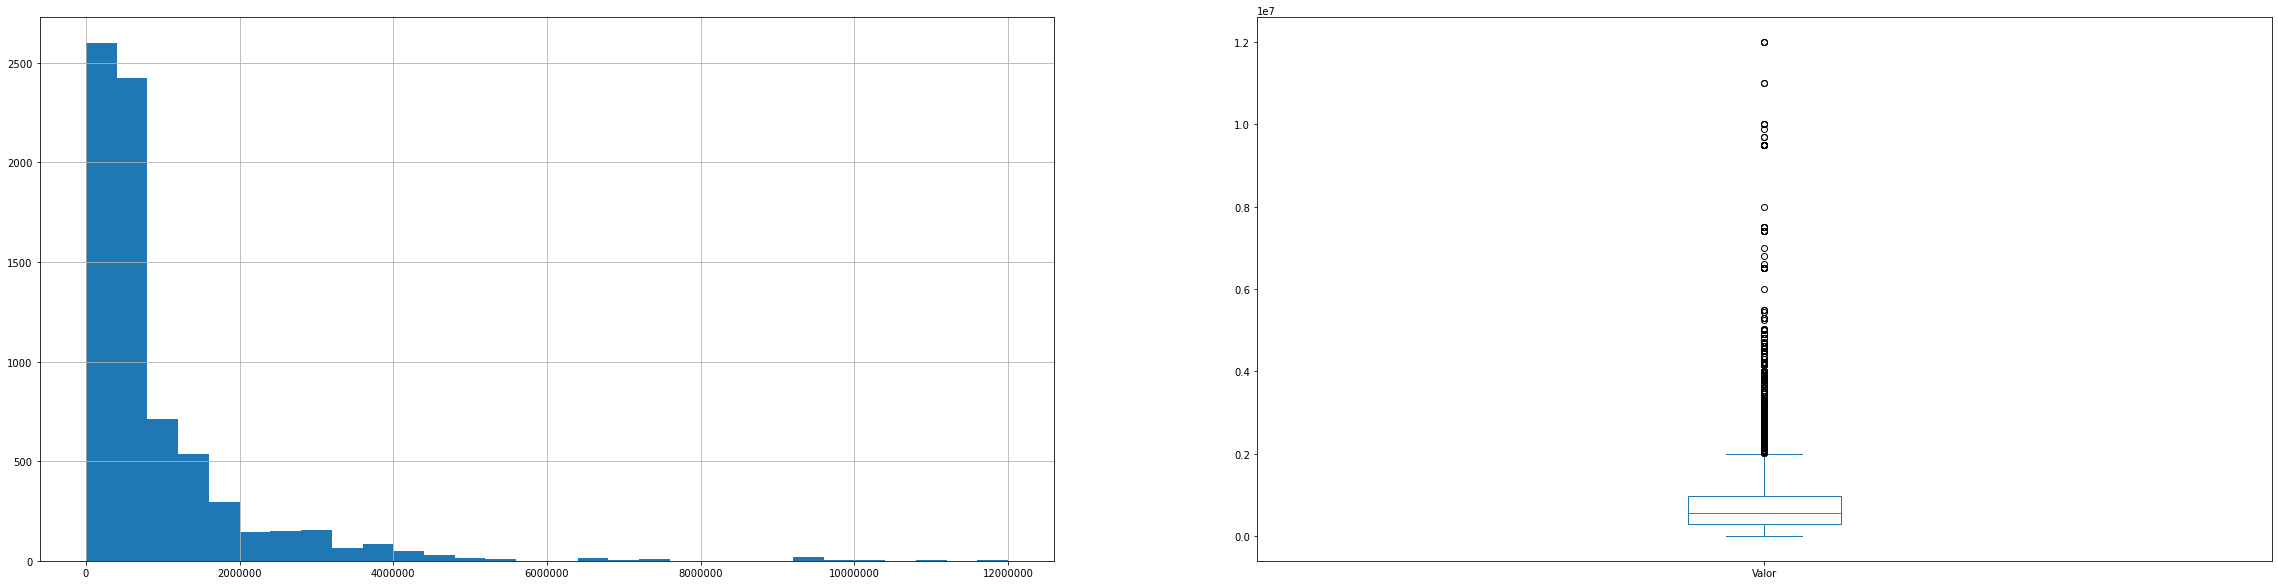

In [11]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

In [12]:
df[df['Valor']<=10000]

,Codigo,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,CEP,Município,Bairro,Area
92,945755151,"9,000.0000",Casas,Venda - casa em rua pública,5,5,1,29055450,Vitória,Praia do Canto,194.0000
130,980101553,0.0000,Casas,Venda - casa em rua pública,2,2,2,29015360,Vitória,Centro,NaN
164,979975511,0.0000,Casas,Venda - casa em rua pública,0,0,0,29050224,Vitória,Enseada do Suá,0.0000
183,979831242,"5,500.0000",Casas,Venda - casa em rua pública,2,0,0,29030090,Vitória,São Pedro,0.0000
218,979665713,"5,000.0000",Casas,Venda - casa em rua pública,2,2,0,29030190,Vitória,São Pedro,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6823,967246313,"1,250.0000",Apartamentos,Venda - apartamento padrão,1,1,0,29010001,Vitória,Centro,80.0000
6950,966172636,800.0000,Apartamentos,Venda - apartamento padrão,4,3,2,29090290,Vitória,Jardim Camburi,NaN
7080,859034326,0.0000,Apartamentos,Venda - apartamento padrão,3,2,2,29056135,Vitória,Santa Lúcia,0.0000
7101,965254646,0.0000,Apartamentos,Venda - apartamento padrão,2,1,1,29010250,Vitória,Centro,0.0000


In [13]:
df = df[df['Valor']>10000]

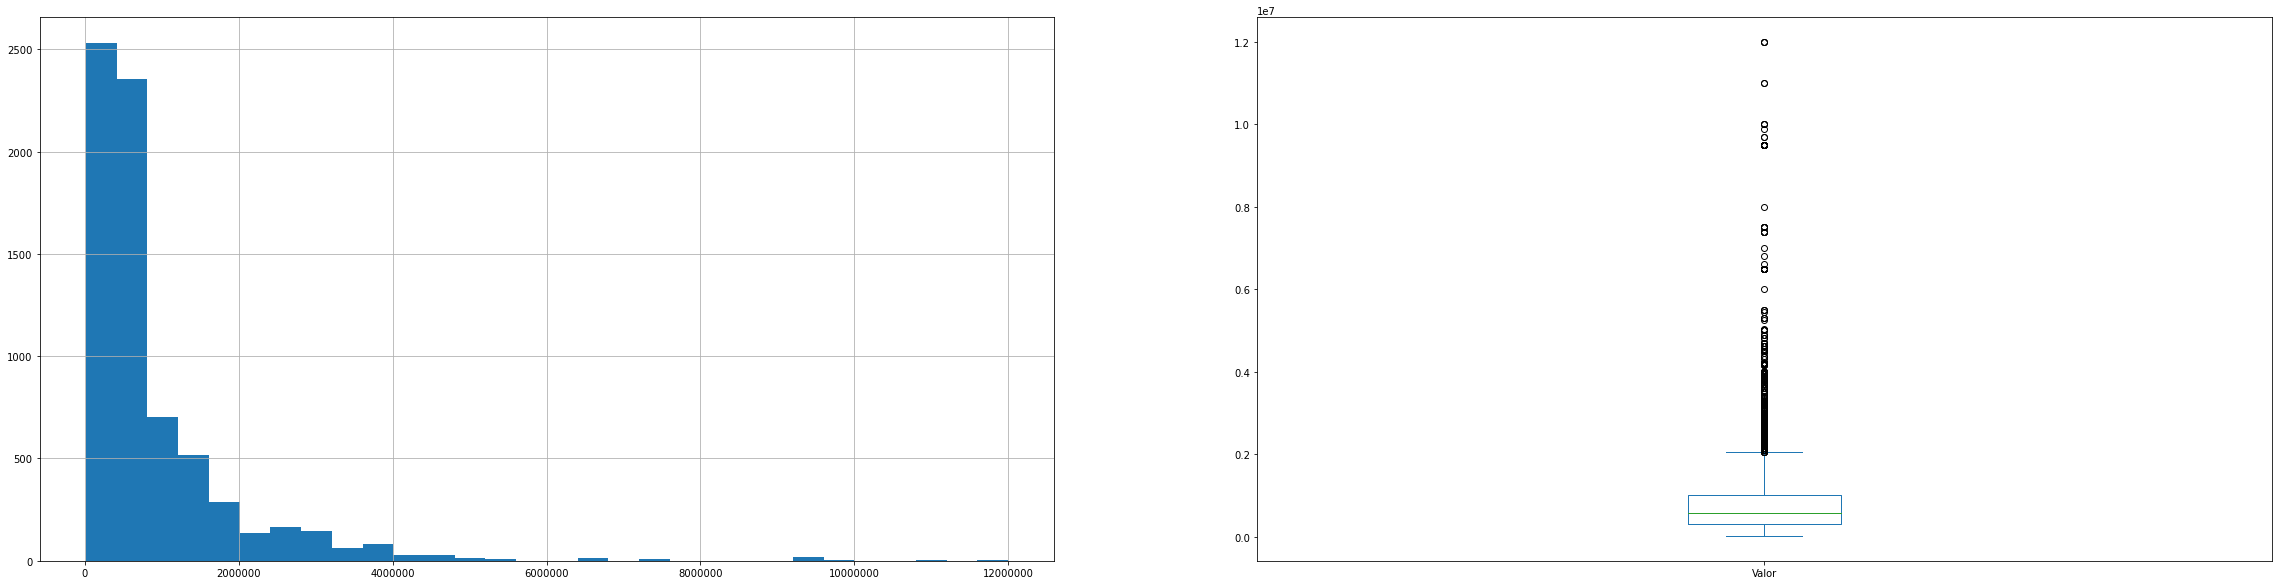

In [14]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

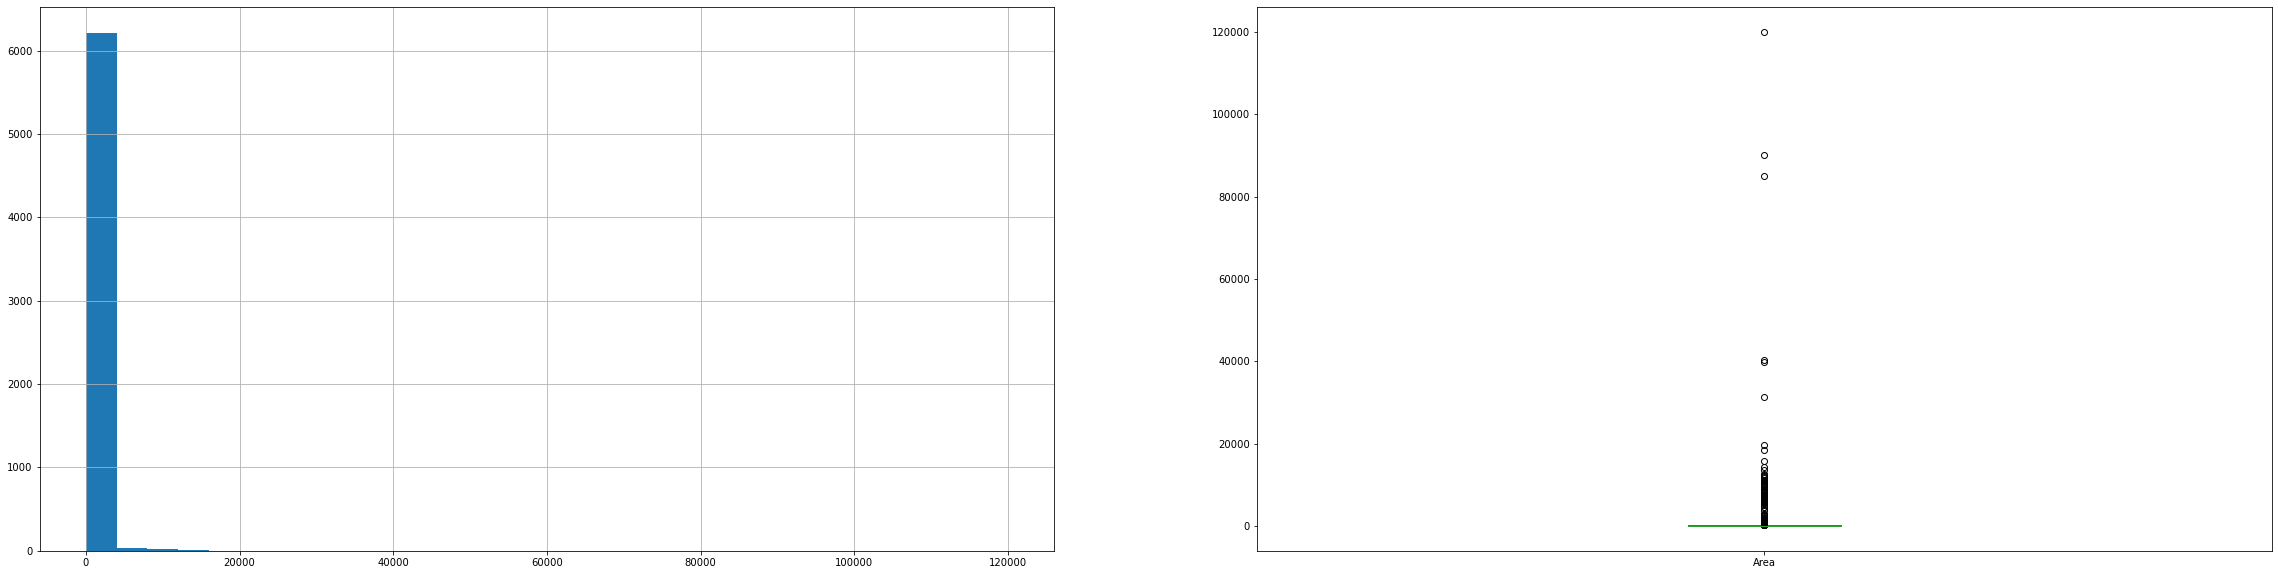

In [15]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [16]:
# Temos 341 itens com area 0 e podemos considerar erros de preenchimento
df[df['Area']==0]

,Codigo,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,CEP,Município,Bairro,Area
1,969551987,"400,000.0000",Casas,Venda - casa em rua pública,3,2,2,29075910,Vitória,Goiabeiras,0.0000
20,972097706,"265,000.0000",Casas,Venda - casa em rua pública,2,2,1,29040870,Vitória,Jucutuquara,0.0000
39,955083484,"250,000.0000",Casas,Venda - casa em rua pública,3,2,2,29046220,Vitória,Gurigica,0.0000
52,915548769,"190,000.0000",Casas,Venda - casa em rua pública,3,4,2,29040700,Vitória,Jucutuquara,0.0000
76,971949200,"270,000.0000",Casas,Venda - casa em rua pública,3,2,1,29075075,Vitória,Goiabeiras,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
7342,962176686,"779,004.0000",Apartamentos,Venda - apartamento padrão,3,2,2,29057530,Vitória,Barro Vermelho,0.0000
7344,962171728,"780,010.0000",Apartamentos,Venda - apartamento padrão,3,3,2,29045250,Vitória,Santa Luíza,0.0000
7375,961850200,"780,000.0000",Apartamentos,Venda - apartamento padrão,3,3,2,29045250,Vitória,Santa Luíza,0.0000
7380,961800628,"469,982.0000",Apartamentos,Venda - apartamento padrão,3,2,1,29090100,Vitória,Jardim Camburi,0.0000


In [17]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>0]

In [18]:
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

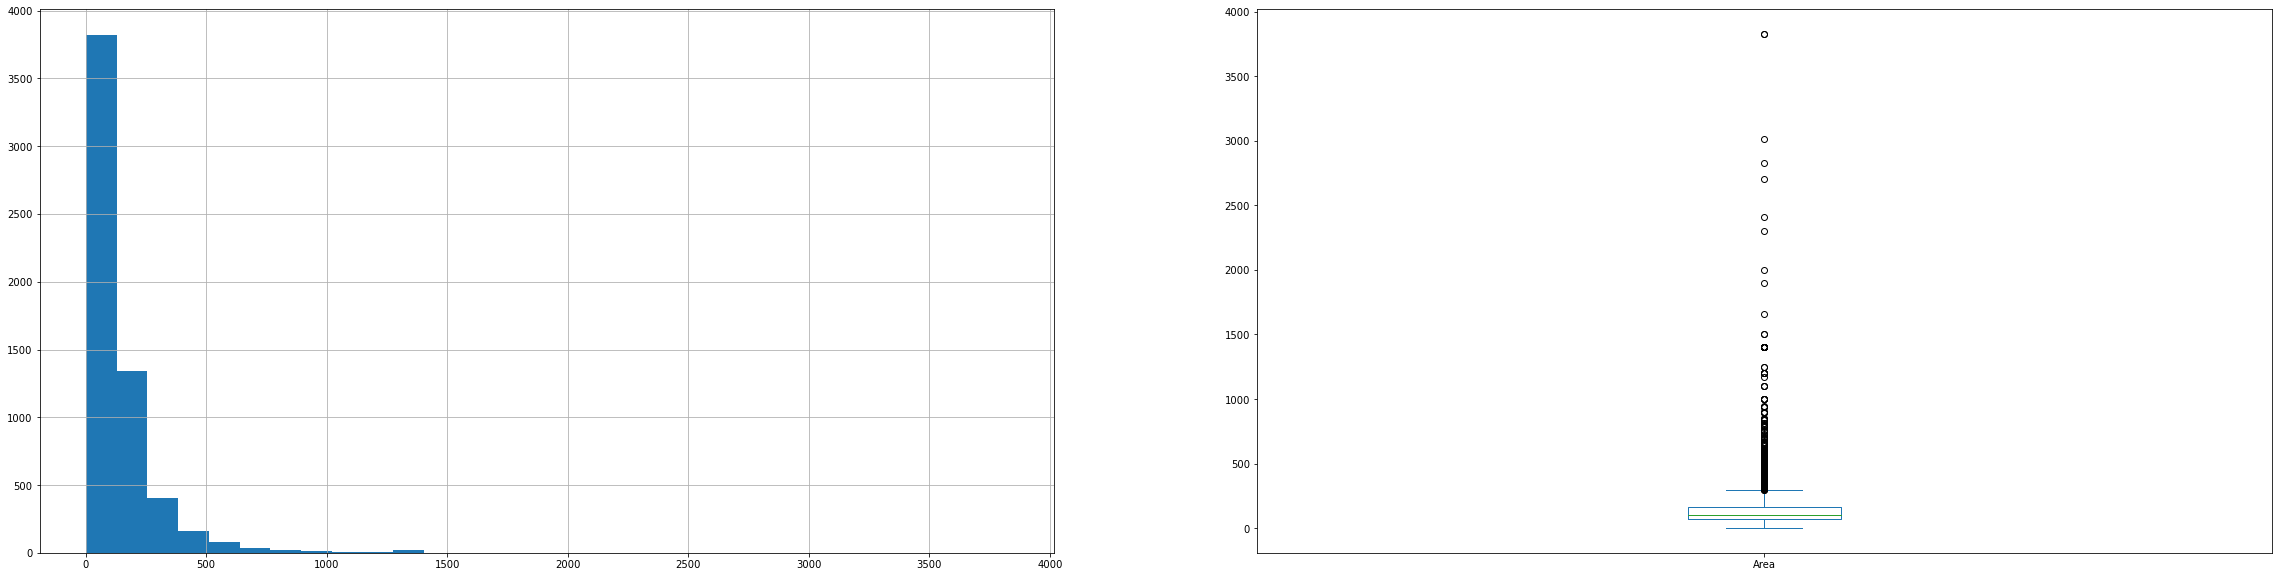

In [19]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [20]:
df['Bairro'].value_counts()

Jardim Camburi       1837
Jardim da Penha       656
Praia do Canto        558
Mata da Praia         434
Bento Ferreira        372
                     ... 
Ilha das Caieiras       1
Jesus de Nazareth       1
Segurança do Lar        1
Parque Industrial       1
Nazareth                1
Name: Bairro, Length: 72, dtype: int64

In [21]:
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [22]:
df['Regiao'] = df['Bairro'].map(regioes)

In [23]:
df['Regiao'].value_counts()

Jardim Camburi     1838
Zona Leste         1578
Jardim da Penha    1193
Jucutuquara         532
Zona Sul            303
Maruípe             256
Zona Norte          104
Santo Antônio        58
Zona Oeste           49
Name: Regiao, dtype: int64

In [24]:
df 

,Codigo,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,CEP,Município,Bairro,Area,Regiao
0,980712935,"150,000.0000",Casas,Venda - casa em rua pública,3,2,1,29047503,Vitória,Itararé,110.0000,Maruípe
2,980709362,"150,000.0000",Casas,Venda - casa em rua pública,2,2,2,29047503,Vitória,Itararé,125.0000,Maruípe
3,909294765,"550,000.0000",Casas,Venda - casa em rua pública,2,1,1,29056260,Vitória,Santa Lúcia,100.0000,Zona Leste
4,958361609,"1,400,000.0000",Casas,Venda - casa em rua pública,4,2,2,29090720,Vitória,Jardim Camburi,180.0000,Jardim Camburi
5,967294592,"400,000.0000",Casas,Venda - casa em rua pública,2,1,0,29075075,Vitória,Goiabeiras,140.0000,Zona Norte
...,...,...,...,...,...,...,...,...,...,...,...,...
7395,906001758,"770,000.0000",Apartamentos,Venda - apartamento padrão,3,1,2,29090010,Vitória,Jardim Camburi,90.0000,Jardim Camburi
7396,961513118,"779,000.0000",Apartamentos,Venda - apartamento padrão,3,3,2,29045250,Vitória,Santa Luíza,87.0000,Zona Leste
7397,911152814,"480,000.0000",Apartamentos,Venda - apartamento padrão,2,2,2,29090350,Vitória,Jardim Camburi,68.0000,Jardim Camburi
7398,826178336,"459,500.0000",Apartamentos,Venda - apartamento padrão,2,2,1,29090670,Vitória,Jardim Camburi,65.0000,Jardim Camburi


In [25]:
df.groupby('Tipo').size()

Tipo
Venda - apartamento cobertura          175
Venda - apartamento duplex/triplex      16
Venda - apartamento kitchenette          8
Venda - apartamento padrão            4518
Venda - casa em condominio fechado     105
Venda - casa em rua pública           1071
Venda - casa em vila                     5
Venda - loft/studio                     13
dtype: int64

In [26]:
df['CEP']

0       29047503
2       29047503
3       29056260
4       29090720
5       29075075
          ...   
7395    29090010
7396    29045250
7397    29090350
7398    29090670
7399    29090585
Name: CEP, Length: 5911, dtype: int64

In [27]:
from api_geolocation import pos

In [28]:
def fncLongLat(x):
    endereco = str(x) + ', Vitoria - ES'
    try: 
        long, lat = pos(endereco)
    except:
        long, lat =[0,0]
    return long, lat

In [29]:
add = str(29090010) + ', Vitoria - ES'

In [30]:
pos(add)

[-20.2605061, -40.2666699]

In [31]:
km , y = fncLongLat(29047503)

In [32]:
df['long'] , df['lat'] = df['CEP'].map(fncLongLat)

ValueError: too many values to unpack (expected 2)